In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import percentile
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.drop("customerID", axis=1, inplace=True)

In [4]:
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')  

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7001 non-null   object 
 1   SeniorCitizen     7001 non-null   int64  
 2   Partner           7001 non-null   object 
 3   Dependents        7001 non-null   object 
 4   tenure            7001 non-null   int64  
 5   PhoneService      7001 non-null   object 
 6   MultipleLines     7001 non-null   object 
 7   InternetService   7001 non-null   object 
 8   OnlineSecurity    7001 non-null   object 
 9   OnlineBackup      7001 non-null   object 
 10  DeviceProtection  7001 non-null   object 
 11  TechSupport       7001 non-null   object 
 12  StreamingTV       7001 non-null   object 
 13  StreamingMovies   7001 non-null   object 
 14  Contract          7001 non-null   object 
 15  PaperlessBilling  7001 non-null   object 
 16  PaymentMethod     7001 non-null   object 


In [91]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
count                0
dtype: int64

In [10]:
## This is to find if there is any duplicate in the data set
df.duplicated().sum()

22

In [11]:
# dropping ALL duplicate values
df.drop_duplicates(keep = False, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7001 non-null   object 
 1   SeniorCitizen     7001 non-null   int64  
 2   Partner           7001 non-null   object 
 3   Dependents        7001 non-null   object 
 4   tenure            7001 non-null   int64  
 5   PhoneService      7001 non-null   object 
 6   MultipleLines     7001 non-null   object 
 7   InternetService   7001 non-null   object 
 8   OnlineSecurity    7001 non-null   object 
 9   OnlineBackup      7001 non-null   object 
 10  DeviceProtection  7001 non-null   object 
 11  TechSupport       7001 non-null   object 
 12  StreamingTV       7001 non-null   object 
 13  StreamingMovies   7001 non-null   object 
 14  Contract          7001 non-null   object 
 15  PaperlessBilling  7001 non-null   object 
 16  PaymentMethod     7001 non-null   object 


In [13]:
## Check if the duplicate is dropped in the data set
df.duplicated().sum()

0

# Data Analysis and Visualization

In [55]:
df.Churn.value_counts()

No     5156
Yes    1845
Name: Churn, dtype: int64

In [69]:
df = df.copy()
df['count'] = 1

In [70]:
def plot_sunburst(col):
    fig = px.sunburst(df,path=[col,'Churn'],values='count',
                      names=col)
    
    fig.update_layout(height=600, width=600, title_text=f'<b style="color:#7b8b6f;">Percent of Churn by {col}</b>')
    fig.update_traces(textinfo="label+percent parent", textfont_size=16)
    return fig.show()





In [71]:
fig = go.Figure(go.Pie(labels=['No','Yes'],values=df.Churn.value_counts(),name='Churn'))
fig.update_traces(hole=.4, hoverinfo="label+percent", 
                  textfont_size=16)

fig.update_layout(height=500, width=500, title_text='<b style="color:#7b8b6f;">Percent of Churn</b>')
fig.show()

In [80]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [81]:
for i in cols:
    plot_sunburst(i)

In [87]:
common_relationship = [trends for trends in df.columns]


In [86]:
for trends in common_relationship:
    fig = px.histogram(df, x= trends, title= 'Distribution of '+trends, color="Churn",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})
    fig.show()

In [19]:
target = 'Churn'
X= df.drop(target, axis=1)
y =df[target]

In [20]:
num_cols = X.select_dtypes("number").copy()
cat_cols = X.select_dtypes("object").copy()

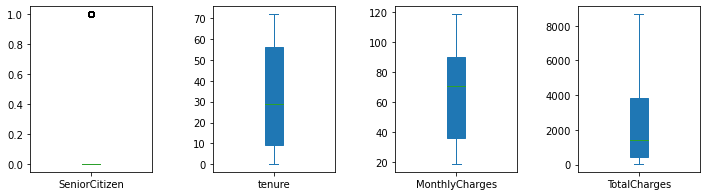

In [21]:
## This is to find outliers in the dataset
num_cols.plot(subplots =True, kind = 'box', layout = (4,4), figsize = (12,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

<AxesSubplot:>

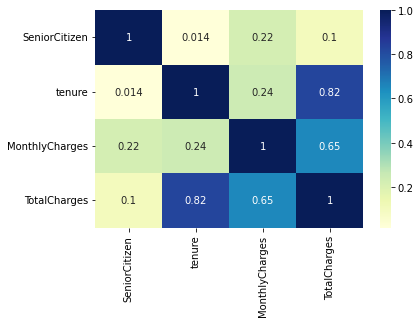

In [25]:
sns.heatmap(num_cols.corr(), annot=True, cmap="YlGnBu")

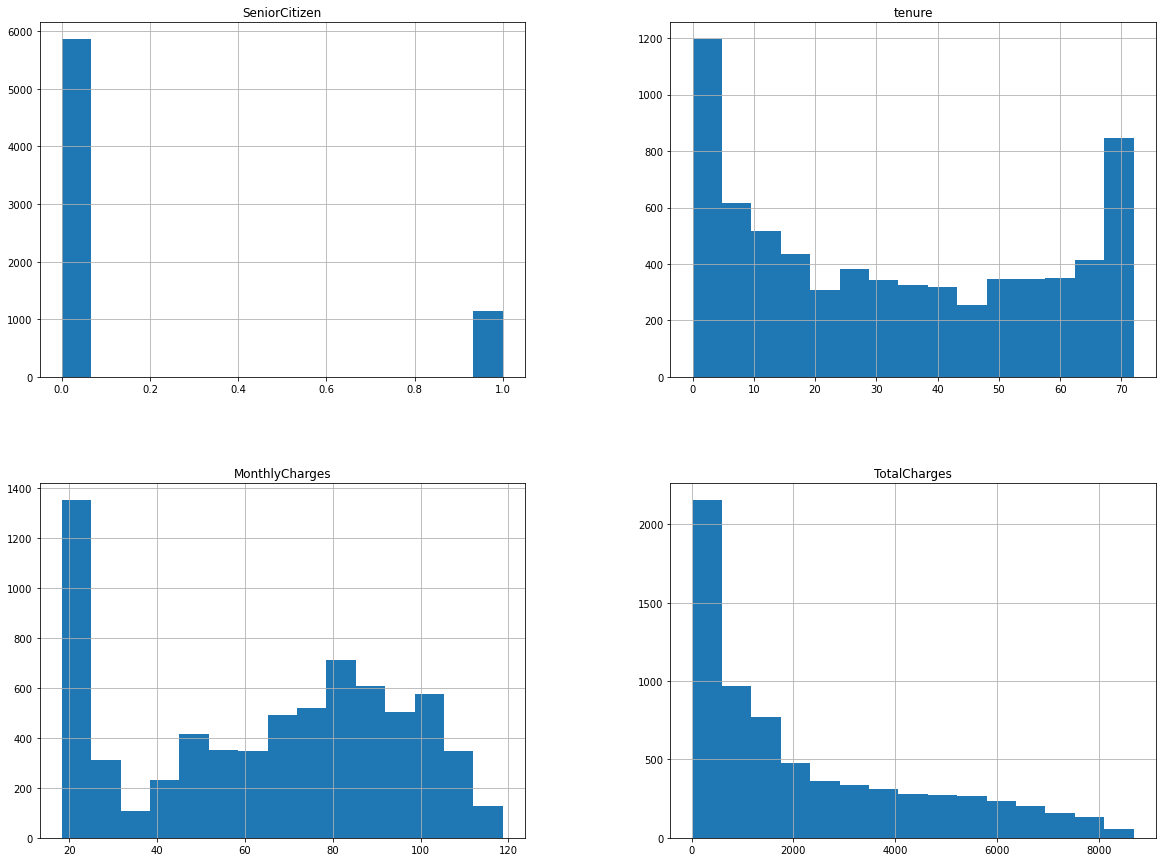

In [27]:
num_cols.hist(figsize=(20,15) ,bins = 15)
plt.show()

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [35]:
num_cols = X.select_dtypes("number").columns
    
num_trans = make_pipeline( SimpleImputer(strategy="median"), StandardScaler())

cat_cols = X.select_dtypes("object").columns

cat_trans = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                          OneHotEncoder(handle_unknown='error', drop='if_binary'))

In [36]:
preprocessor = make_column_transformer((num_trans, num_cols), 
                                    (cat_trans, cat_cols))

# Model selection 

In [44]:
classifer = [RandomForestClassifier(), SVC(), LogisticRegression(max_iter=500), KNeighborsClassifier(), GaussianNB()]

for clf in classifer:
    pipe = make_pipeline(preprocessor, clf)
    grid = GridSearchCV(pipe, cv=5, scoring='accuracy', param_grid={})
    grid.fit(X_train, y_train)
    score = grid.best_score_
    print(f'Classier {clf} scored {score}\n')

Classier RandomForestClassifier() scored 0.7822857142857144

Classier SVC() scored 0.7921904761904763

Classier LogisticRegression(max_iter=500) scored 0.7986666666666667

Classier KNeighborsClassifier() scored 0.7594285714285715

Classier GaussianNB() scored 0.6885714285714285



# Using the best Model

####  The best model is Classier LogisticRegression with scored 0.7986666666666667

In [92]:
param_grid = {
              'logisticregression__C':[2,0.01,0.05,0.1]           
             }

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
grid = GridSearchCV(pipe, param_grid= param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'{grid.best_score_}\n {grid.best_params_}')

0.7996190476190477
 {'logisticregression__C': 2}


# Final Evaluation on the test data

In [47]:
grid.best_estimator_.score(X_test, y_test)

0.817818389491719

In [50]:
pred =grid.predict(X_test)
cm = confusion_matrix(y_test, pred)

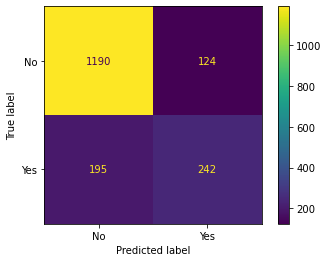

In [51]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

In [52]:
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection

/Users/oluwasegunadesanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


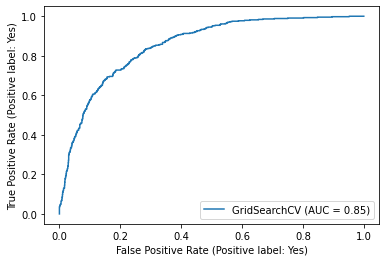

In [53]:
metrics.plot_roc_curve(grid, X_test, y_test)
plt.show()

# reusability of code

- The aim here is to give you an idea of the next steps after you've built a model with satisfactory test performance
- This is just opening one of many doors that you have yet do discover
- General theme is to think in terms of reusability of code (all the effort you have put in is at least partly stored in the code)
    - Important parts of reusability are:
        - Structure
        - Readability
        - Memory

So if we have neat & structured code with good comments that we are storing in a well organized file/folder system that is stored in a accessible way we will make our own lives and the lives of our teammates easier (and we will be able to provide more value & earn more moneys!)

Another big part of memory that is highly relevant in machine learning is that we need to store the memory of:
- Our preprocessing pipeline
    - Scaling method
    - Encoding method
    - Imputation method
- Our models decision logic
    - Weights of features/coefficients
    - (Hyper)parameter settings
    
In the code below we will save our model to a file. This shows a first step of how we take a model out of our Notebook and into production

## Pickle/ Joblib

In [89]:
model = make_pipeline(preprocessor, LogisticRegression())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                               

In [93]:
from joblib import dump

In [94]:
dump(model, 'churnCustomer_model.joblib')

['churnCustomer_model.joblib']